## Medical Cost

Kesehatan merupakan kesejahteraan bagi setiap masyarakat. Dengan kondisi kesehatan yang prima, manusia dapat menjalankan perannya dengan baik, sehingga ia dapat meningkatkan kualitas hidupnya.

Tubuh yang sehat adalah sesuatu yang diinginkan semua orang, tetapi apa yang akan terjadi bila suatu saat jika kita sakit dan perlu ke rumah sakit untuk perawatan lebih lanjut? Berapa banyak uang yang perlu keluarkan untuk menangani penyakit?

Peningkatan biaya untuk layanan medis disebabkan oleh pertumbuhan populasi dan penuaan. Tetapi begitu pula faktor-faktor lain seperti meningkatnya jumlah penderita penyakit kronis, peningkatan biaya rawat jalan dan ruang gawat darurat, premi yang lebih tinggi, dan biaya sendiri yang lebih tinggi. Faktor-faktor tersebut diperparah dengan inefisiensi dan kurangnya transparansi dalam dunia kedokteran.

Data Requirement:
*   age: usia
*   sex: jenis kelamin
*   bmi: body mass index, 
*   children: jumlah anak yang dicover oleh asuransi / jumlah tanggungan
*   smoker: apakah perokok atau tidak
*   region: area tempat tinggal
*   charges: biaya pengobatan oleh asuransi

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from statsmodels.formula.api import ols


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Insites

In [ ]:
path='insurance.csv'

In [ ]:
raw_data = pd.read_csv(path)
df = pd.read_csv(path)
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
raw_data_c=raw_data.drop(["sex", "smoker", "region"], axis=1).copy() #only continuous variable dataset will be used for plots

In [ ]:
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tidak ada null

### Histogram

Text(0.5, 0, 'Region')

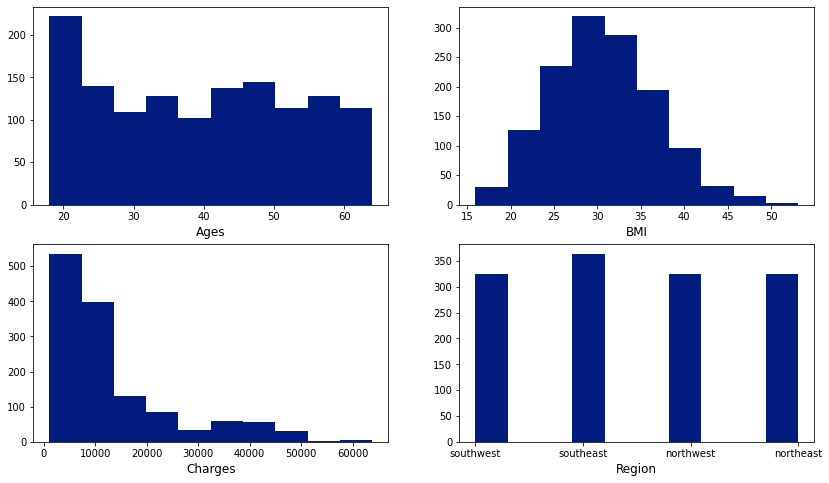

In [ ]:
plt.figure(figsize=(14,8))
style.use("seaborn-dark-palette")
plt.subplot(2,2,1)
plt.hist(raw_data["age"])
plt.xlabel("Ages", fontsize=12)
plt.subplot(2,2,2)
plt.hist(raw_data["bmi"])
plt.xlabel("BMI", fontsize=12)
plt.subplot(2,2,3)
plt.hist(raw_data["charges"])
plt.xlabel("Charges", fontsize=12)
plt.subplot(2,2,4)
plt.hist(raw_data["region"])
plt.xlabel("Region", fontsize=12)

### Correlation

In [ ]:
corr_mat=raw_data_c.corr()
corr_mat

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### Plotting Correlation plot

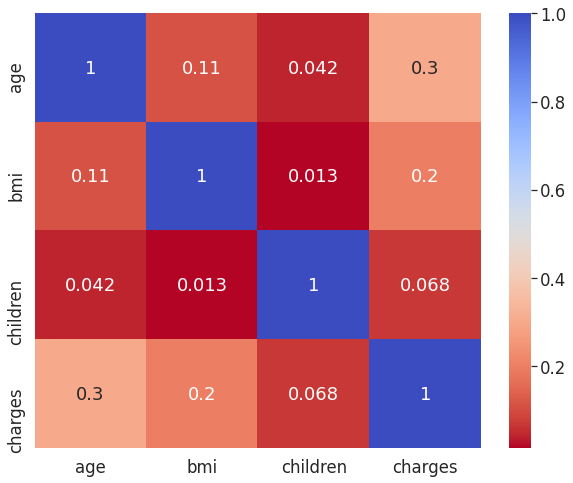

In [ ]:
plt.figure(figsize=(10,8))
corar=np.array(corr_mat.values)
sns.set(font_scale=1.5)
sns.heatmap(corr_mat, annot=corar,cmap="coolwarm_r")

Dari correlation plot dapat dilihat bahwa **age** dan **charges** memiliki positive correlation yang kecil.

In [ ]:
raw_data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

### Hubungan antara Age dan Charges.

*   Young Adult : 17-30 Tahun
*   Adult : 31-59 Tahun
*   Old : >59 Tahun


In [ ]:
raw_data.loc[(raw_data.age>17) & (raw_data.age<=30), "age_cat"]="Young Adult"
raw_data.loc[(raw_data.age>30) & (raw_data.age<=59), "age_cat"]="Adult"
raw_data.loc[(raw_data.age>59), "age_cat"]="Old"
raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult
3,33,male,22.705,0,no,northwest,21984.47061,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Adult
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult


Adult          780
Young Adult    444
Old            114
Name: age_cat, dtype: int64


([<matplotlib.patches.Wedge at 0x7f7cfe221128>,
 [Text(-0.30922189662362254, 1.159474802938162, 'Young Adult'),
  Text(-0.008522953917266443, -1.2099699827915253, 'Adult'),
  Text(1.0608289775377782, -0.29093277645557974, 'Old')],
 [Text(-0.18037943969711315, 0.6763603017139278, '58.3%'),
  Text(-0.005001072133272045, -0.7099823865966801, '33.2%'),
  Text(0.5786339877478789, -0.1586906053394071, '8.5%')])

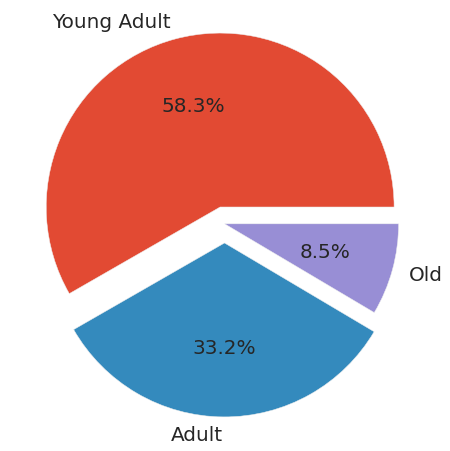

In [ ]:
labels=raw_data.age_cat.unique().tolist()
count=raw_data.age_cat.value_counts()
print(count)
count=count.values
style.use("ggplot")
plt.figure(figsize=(8,8))
explode=(0.1,0.11,0)
plt.pie(count, labels=labels,explode=explode, autopct="%1.1f%%", textprops={'fontsize': 20})

Text(0, 0.5, 'Charges Standard Deviation')

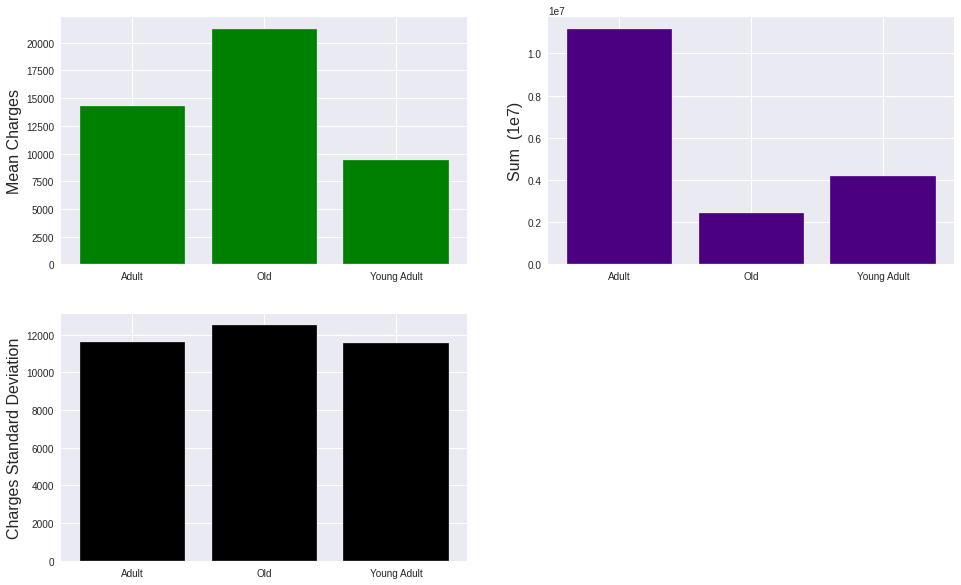

In [ ]:
charge_avg_age=raw_data.groupby("age_cat")["charges"].mean()
labels_avg=charge_avg_age.keys()
charge_avg_age=charge_avg_age.tolist()

charge_sum_age=raw_data.groupby(["age_cat"])["charges"].sum()
labels_sum=charge_sum_age.keys()
charge_sum_age=charge_sum_age.tolist()

charge_std_age=raw_data.groupby(["age_cat"])["charges"].std()
labels_std=charge_std_age.keys()
charge_std_age=charge_std_age.tolist()


style.use("seaborn")
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.bar(labels_avg, charge_avg_age, color="green")
plt.ylabel("Mean Charges", fontsize=16)
plt.subplot(2,2,2)
plt.bar(labels_sum, charge_sum_age, color="indigo")
plt.ylabel("Sum  (1e7)", fontsize=16)
plt.subplot(2,2,3)
plt.bar(labels_sum, charge_std_age, color="black")
plt.ylabel("Charges Standard Deviation", fontsize=16)

Dari grafik tersebut dalam diambil kesimpulan:

1. **Adults** terdiri dari 33,2% dari keseluruhan data dan dengan jumlah total charge yang tertinggi dengan mean charges kurang dari \$15.000, dengan deviasi standar \$12.000. Umur Adults berkisar antara 30 sampai 59 dengan umur kritis dimulai setelah 59 dimana banyak timbul penyakit akibat stres kerja dan faktor sosial lingkungan.

2. **Young Adult** rentang usia dari 18 hingga 30. Usia ketika tubuh manusia berada pada puncaknya. Dengan 58,3% representasi. Dengan rata-rata sekitar kurang dari \$10.000 dan deviasi standar sekitar \$10.000.

3. **Old** adalah umur dimana biaya pengobatan menjadi pengeluaran utama dan dibuktikan dengan fakta bahwa rata-rata biaya termasuk yang tertinggi yaitu di atas \$20,000 dengan deviasi standar \$13,000.

### Hubungan antara Sex dan Charges

In [ ]:
raw_data["log_charges"]=np.log(raw_data["charges"])
raw_data 

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867


Text(0.5, 0, 'Log of Charges')

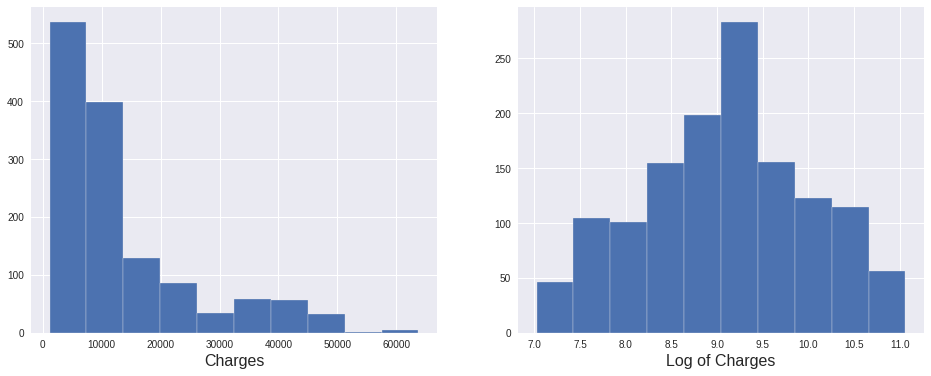

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
raw_data["charges"].hist()
plt.xlabel("Charges", fontsize=16)


plt.subplot(1,2,2)
raw_data["log_charges"].hist()
plt.xlabel("Log of Charges", fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


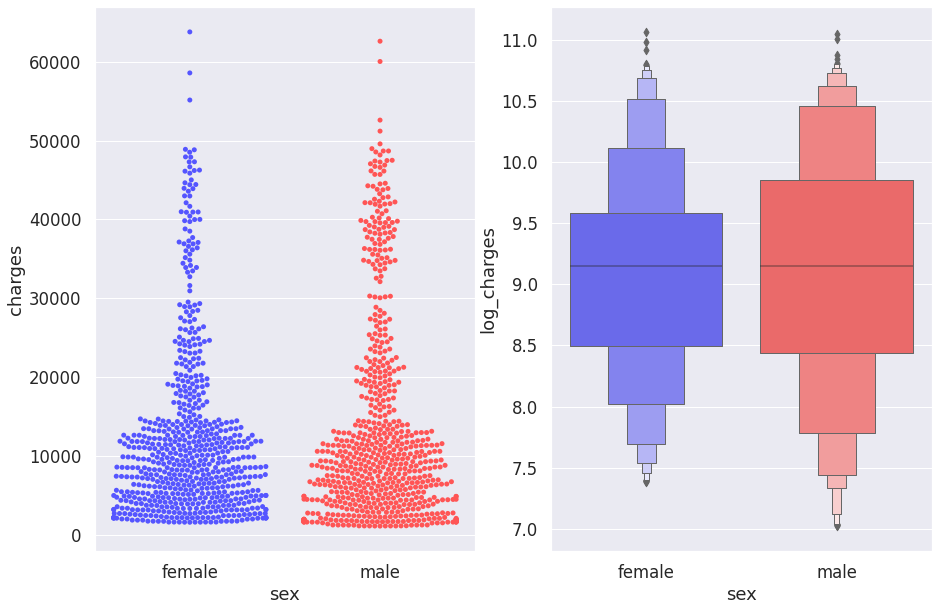

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
plt.subplot(1,2,1)
sns.swarmplot(raw_data["sex"], raw_data["charges"], palette ="seismic")
plt.subplot(1,2,2)
sns.boxenplot(raw_data["sex"], raw_data["log_charges"], palette ="seismic")

Grafik menunjukkan korelasi antara sex dan charges dengan rata-rata sekitar $10.000.

### Hubungan antara BMI dan Gender

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


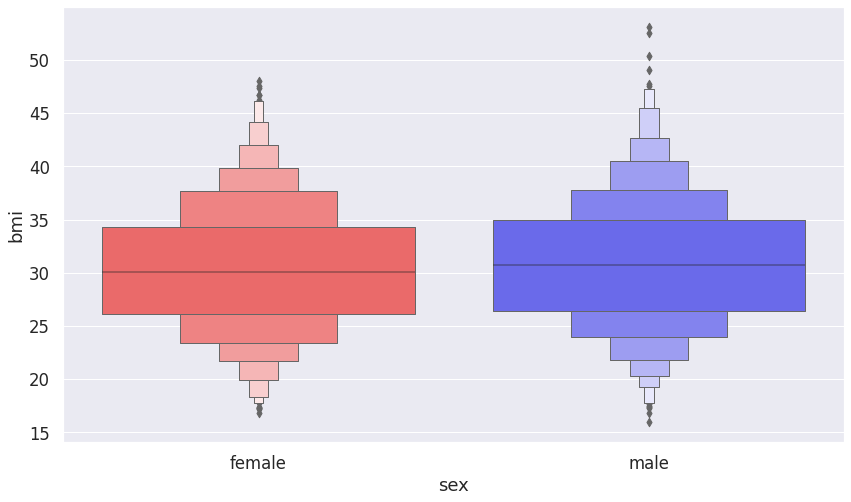

In [ ]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.boxenplot(raw_data["sex"], raw_data["bmi"], palette ="seismic_r")

**Kategori BMI**
*   Under Weight: BMI < 19
*   Normal Weight: 19 <= BMI <= 25
*   Overweight: 25 < BMI <= 30
*   Obese: BMI > 30

In [ ]:
raw_data.loc[(raw_data.age<19), "bmi_cat"]="Underweight"
raw_data.loc[(raw_data.age>=19) & (raw_data.age<=25), "bmi_cat"]="Normal"
raw_data.loc[(raw_data.age>25) & (raw_data.age<=30), "bmi_cat"]="Overweight"
raw_data.loc[(raw_data.age>30), "bmi_cat"]="Obese"
raw_data.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese


Text(0, 0.5, 'Count')

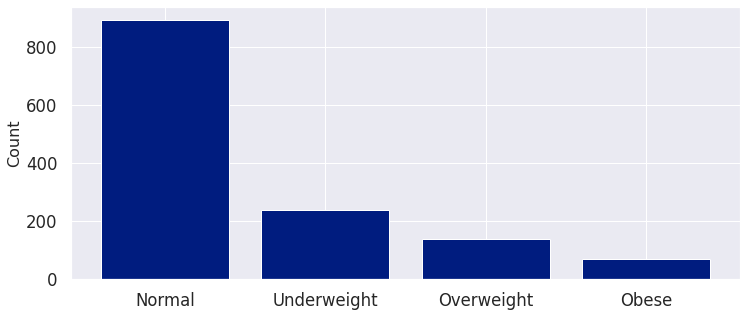

In [ ]:
bmi_val=raw_data["bmi_cat"].value_counts()
bmi_val=bmi_val.tolist()
style.use("seaborn-dark-palette")
labels=raw_data["bmi_cat"].unique()
plt.figure(figsize=(12,5))
plt.bar(labels, bmi_val)
plt.ylabel("Count", fontsize=16)

### Hubungan antara BMI and Charges

Text(0, 0.5, 'Count')

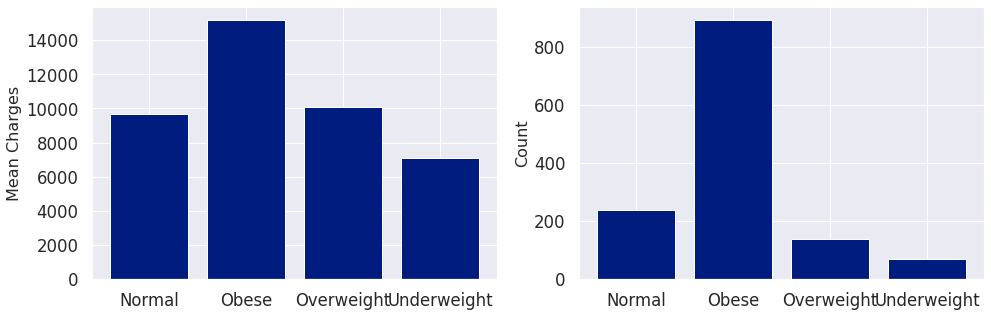

In [ ]:
bmi_avg_charge=raw_data.groupby("bmi_cat")["charges"].mean()
labels_a=bmi_avg_charge.keys()
bmi_avg_charge=bmi_avg_charge.tolist()

bmi_count_charge=raw_data.groupby("bmi_cat")["charges"].count()
labels_c=bmi_count_charge.keys()
bmi_count_charge=bmi_count_charge.tolist()


style.use("seaborn-dark-palette")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(labels_a, bmi_avg_charge)
plt.ylabel("Mean Charges", fontsize=16)

plt.subplot(1,2,2)
plt.bar(labels_c, bmi_count_charge)
plt.ylabel("Count", fontsize=16)


Dari grafik dapat dilihat Obese memiliki impact paling besar untuk chargenya.

### Hubungan antara Smoking dan Charges

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


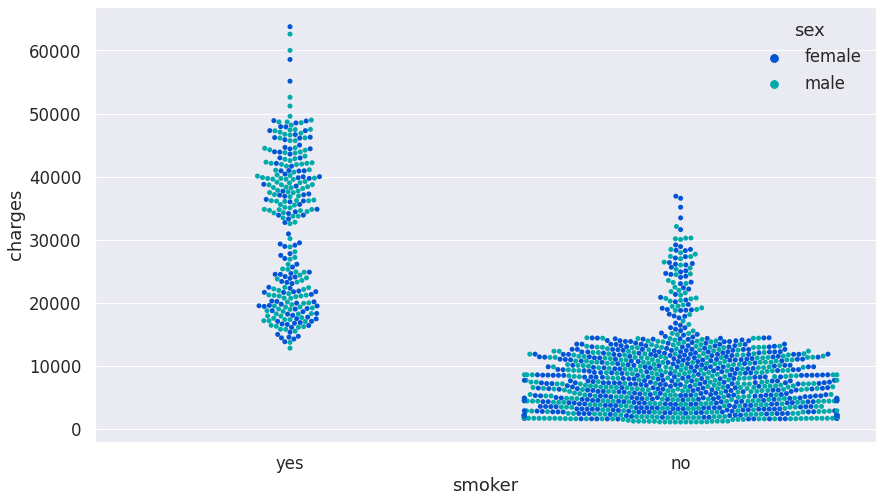

In [ ]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
sns.swarmplot(raw_data["smoker"], raw_data["charges"],hue=raw_data["sex"], palette="winter")

bmi_cat        Normal         Obese    Overweight   Underweight
smoker                                                         
no        4248.268569  10373.029092   5485.185211   3215.162259
yes      28490.498279  34450.257426  26649.542370  25473.730221


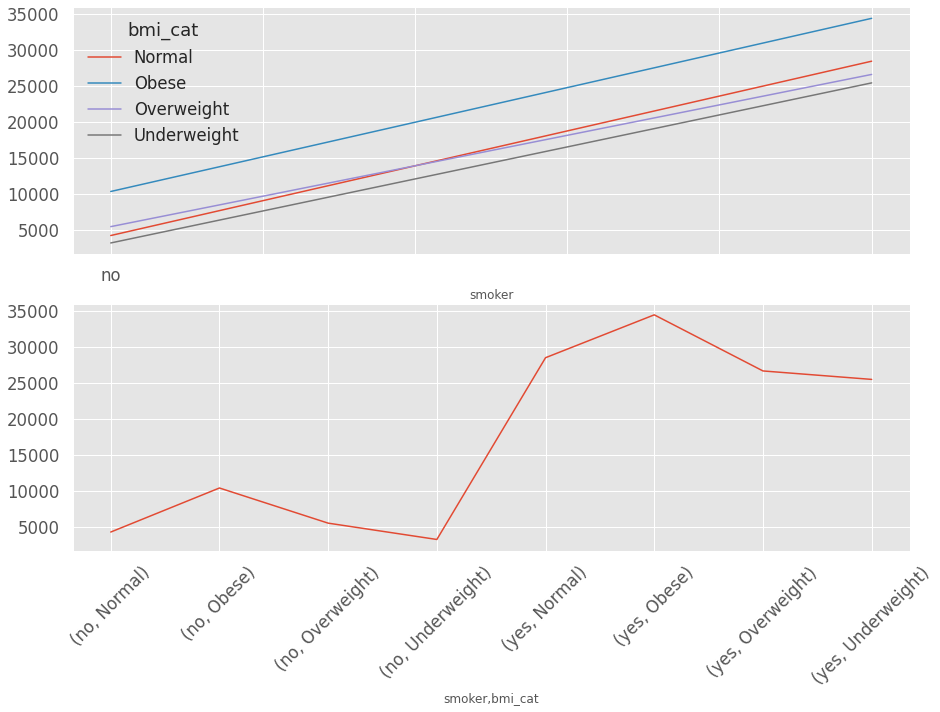

In [ ]:
plt.figure(figsize=(15,10))
style.use("ggplot")
ax=plt.subplot(2,1,1)
smk_bmi=raw_data.groupby(["smoker", "bmi_cat"])["charges"].mean().unstack()
print(smk_bmi)
smk_bmi.plot(ax=ax)

ax=plt.subplot(2,1,2)
smk_bmi=raw_data.groupby(["smoker", "bmi_cat"])["charges"].mean().plot(ax=ax)
ax.tick_params('x',labelrotation=45)

Dari ketiga grafik tersebut diketahui bahwa smoking dan charge berhubungan langsung. Smoker cenderung menghabiskan lebih banyak untuk charge daripada non-smoker. 

### Standarisasi Data

$$z=(x-u)/sd$$

In [ ]:
raw_data_c.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [ ]:
print(raw_data_c.to_numpy())

NameError: ignored

In [ ]:
std_scl=StandardScaler()
raw_data_std=std_scl.fit_transform(raw_data_c)
print("columns as age, bmi. children, charges")
print(raw_data_std)
type(raw_data_std)

In [ ]:
bmi_charg_c=raw_data_std[:,[1,3]]
print(bmi_charg_c)
print(bmi_charg_c.shape)

### Clustering 

Pada challenge ini digunakan metode K-Means Cluster sebagai solusi untuk pengklasifikasian karakteristik dari objek. Alasan penggunaan algoritma K-Means diantaranya ialah karena algoritma ini memiliki ketelitian yang cukup tinggi terhadap ukuran objek, sehingga algoritma ini relatif lebih terukur dan efisien untuk pengolahan objek dalam jumlah besar. Selain itu algoritma K-Means ini tidak terpengaruh terhadap urutan objek

Untuk mendapatkan nilai n_clusters=k terbaik, dijalankan for-loop dan menghitung WSS metode Elbow dan skor Silhoutte untuk setiap "k".

**BMI**

In [ ]:
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(bmi_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

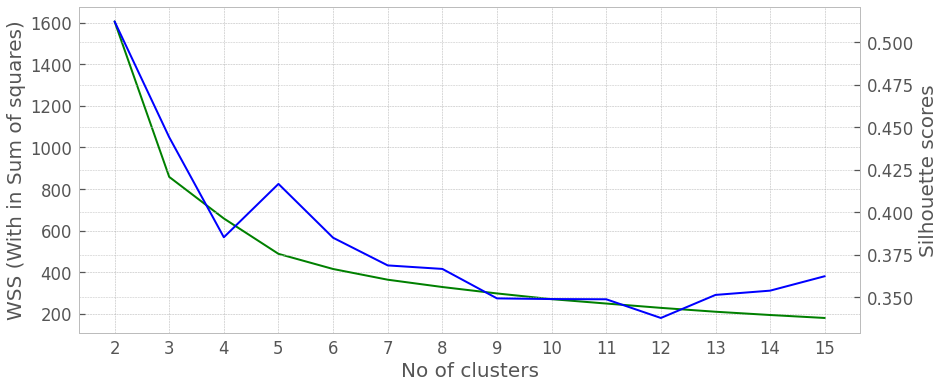

In [ ]:
k=range(2,16)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [ ]:
bmi_charg_c

array([[-0.45332   ,  0.2985838 ],
       [ 0.5096211 , -0.95368917],
       [ 0.38330685, -0.72867467],
       ...,
       [ 1.0148781 , -0.96159623],
       [-0.79781341, -0.93036151],
       [-0.26138796,  1.31105347]])

Dari grafik, terlihat elbox ada pada nilai 3 dan silhoutte score hampir terbaik pada saat itu.

In [ ]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(bmi_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
raw_data["clusters"]=clusters
raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,1
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight,0
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight,0
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese,1
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese,0
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight,0
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight,0
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal,1


In [ ]:
raw_data2=raw_data.sort_values(["clusters"]).copy()

In [ ]:
for i in range(0,k+1):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65))
    
raw_data2

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
945,56,female,35.80,1,no,southwest,11674.13000,Adult,9.365131,Obese,A
449,35,male,38.60,1,no,southwest,4762.32900,Adult,8.468492,Obese,A
895,61,female,44.00,0,no,southwest,13063.88300,Old,9.477607,Obese,A
894,62,male,32.11,0,no,northeast,13555.00490,Old,9.514511,Obese,A
1217,29,male,37.29,2,no,southeast,4058.11610,Young Adult,8.308474,Overweight,A
...,...,...,...,...,...,...,...,...,...,...,...
803,18,female,42.24,0,yes,southeast,38792.68560,Young Adult,10.565987,Underweight,C
770,61,male,36.10,3,no,southwest,27941.28758,Old,10.237861,Obese,C
759,18,male,38.17,0,yes,southeast,36307.79830,Young Adult,10.499788,Underweight,C
615,47,female,36.63,1,yes,southeast,42969.85270,Adult,10.668254,Obese,C


In [ ]:
raw_data2["clusters"].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
x=raw_data2.iloc[:,[2,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on BMI')

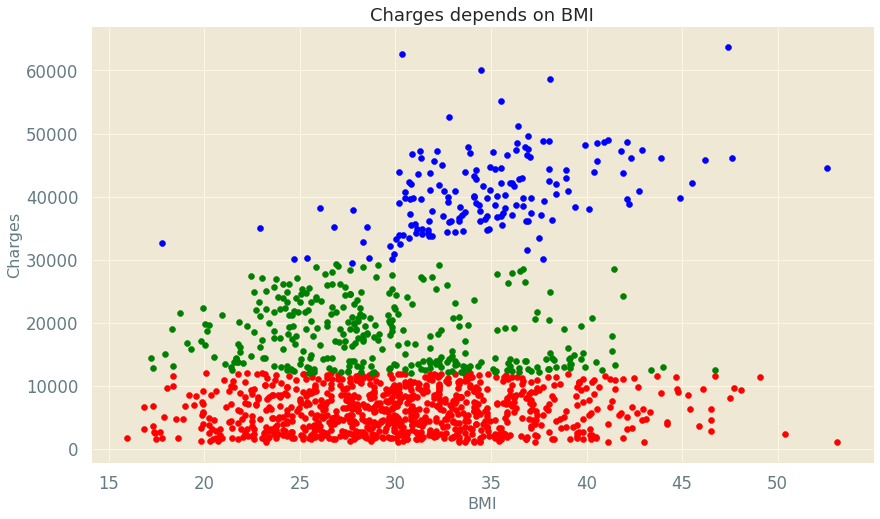

In [ ]:
plt.figure(figsize=(14,8))
style.use("Solarize_Light2")
plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("BMI", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on BMI", fontsize=18)

Dari grafik di atas, didapat 3 cluster berbeda. Dengan BMI (15 hingga 35) memiliki biaya \$10.000 hingga \$30.000 sedangkan BMI yang lebih tinggi memiliki biaya yang jauh lebih tinggi.

**"Age"**

In [ ]:
age_charg_c=raw_data_std[:,[0,3]]
print(age_charg_c)
print(age_charg_c.shape)

[[-1.43876426  0.2985838 ]
 [-1.50996545 -0.95368917]
 [-0.79795355 -0.72867467]
 ...
 [-1.50996545 -0.96159623]
 [-1.29636188 -0.93036151]
 [ 1.55168573  1.31105347]]
(1338, 2)


In [ ]:
wss=[]
sil=[]
for k in range(2,16):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)
    wss.append(kmeans.inertia_)
    labels=kmeans.labels_
    silhoutte=silhouette_score(age_charg_c, labels, metric = 'euclidean')
    sil.append(silhoutte)

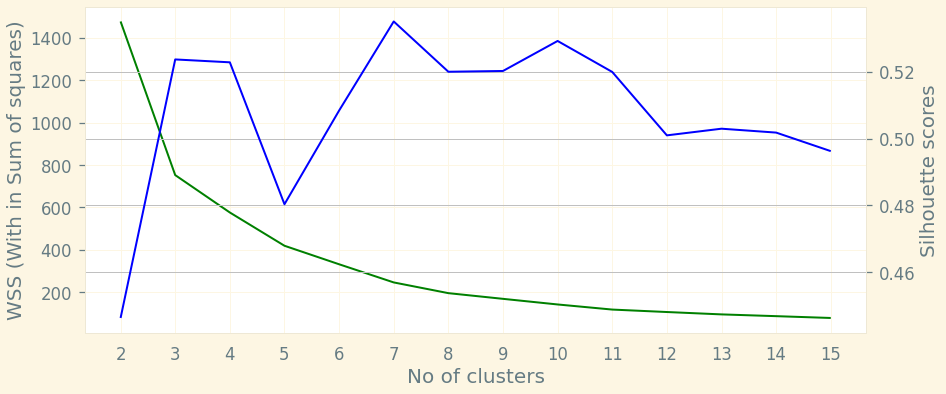

In [ ]:
k=range(2,16)
fig,ax=plt.subplots(figsize=(14,6))
ax.set_facecolor("white")
ax.plot(k, wss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [ ]:
k=3
kmeans=KMeans(n_clusters=k, random_state=1).fit(age_charg_c)
clusters=kmeans.labels_
centrids=kmeans.cluster_centers_
raw_data["clusters"]=clusters
raw_data

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
0,19,female,27.900,0,yes,southwest,16884.92400,Young Adult,9.734176,Normal,2
1,18,male,33.770,1,no,southeast,1725.55230,Young Adult,7.453302,Underweight,2
2,28,male,33.000,3,no,southeast,4449.46200,Young Adult,8.400538,Overweight,2
3,33,male,22.705,0,no,northwest,21984.47061,Adult,9.998092,Obese,2
4,32,male,28.880,0,no,northwest,3866.85520,Adult,8.260197,Obese,2
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Adult,9.268661,Obese,0
1334,18,female,31.920,0,no,northeast,2205.98080,Young Adult,7.698927,Underweight,2
1335,18,female,36.850,0,no,southeast,1629.83350,Young Adult,7.396233,Underweight,2
1336,21,female,25.800,0,no,southwest,2007.94500,Young Adult,7.604867,Normal,2


In [ ]:
raw_data2=raw_data.sort_values(["clusters"]).copy()

In [ ]:
for i in range(0,k+1):
    raw_data2["clusters"]=raw_data2["clusters"].replace(i, chr(i+65))
    
raw_data2

,age,sex,bmi,children,smoker,region,charges,age_cat,log_charges,bmi_cat,clusters
1337,61,female,29.070,0,yes,northwest,29141.36030,Old,10.279914,Obese,A
895,61,female,44.000,0,no,southwest,13063.88300,Old,9.477607,Obese,A
894,62,male,32.110,0,no,northeast,13555.00490,Old,9.514511,Obese,A
892,54,male,24.035,0,no,northeast,10422.91665,Adult,9.251762,Obese,A
424,48,male,30.200,2,no,southwest,8968.33000,Adult,9.101455,Obese,A
...,...,...,...,...,...,...,...,...,...,...,...
413,25,male,23.900,5,no,southwest,5080.09600,Young Adult,8.533085,Normal,C
902,26,male,27.265,3,no,northeast,4661.28635,Young Adult,8.447047,Overweight,C
412,26,female,17.195,2,yes,northeast,14455.64405,Young Adult,9.578840,Overweight,C
1017,26,female,34.200,2,no,southwest,3987.92600,Young Adult,8.291027,Overweight,C


In [ ]:
x=raw_data2.iloc[:,[0,6]].values
print(x.shape)
y=kmeans.fit_predict(x)
print(y.shape)

(1338, 2)
(1338,)


Text(0.5, 1.0, 'Charges depends on Age')

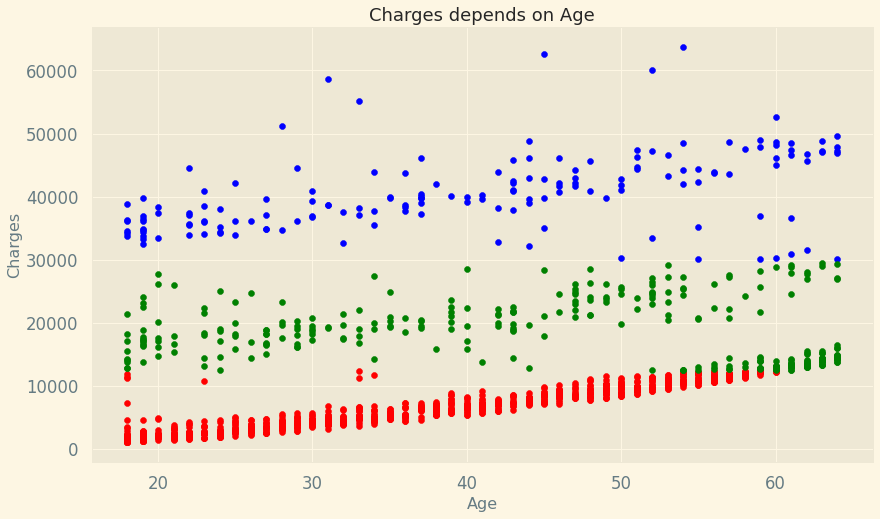

In [ ]:
plt.figure(figsize=(14,8))

plt.scatter(x[y==0,0], x[y==0,1], color="red", label="A")
plt.scatter(x[y==1,0], x[y==1,1], color="blue", label="B")
plt.scatter(x[y==2,0], x[y==2,1], color="green", label="C")

plt.xlabel("Age", fontsize=16)
plt.ylabel("Charges", fontsize=16)
plt.title("Charges depends on Age", fontsize=18)